In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv('../app/data/events.csv')

In [19]:
for c in data.columns:
    print(f"{c:33} {sum(data[c].isna()) / data.shape[0]:10.2%} {len(data[c].unique()):5} {data[c].unique()[:5] if len(data[c].unique()) < 5 else ''}")

ball_receipt_outcome                  96.67%     2 [nan 'Incomplete']
ball_recovery_recovery_failure        99.92%     2 [nan True]
block_deflection                      99.97%     2 [nan True]
carry_end_location                    76.32%   939 
clearance_aerial_won                  99.92%     2 [nan True]
clearance_body_part                   99.37%     4 [nan 'Left Foot' 'Head' 'Right Foot']
clearance_head                        99.70%     2 [nan True]
clearance_left_foot                   99.87%     2 [nan True]
clearance_right_foot                  99.80%     2 [nan True]
counterpress                          97.40%     2 [nan True]
dribble_nutmeg                        99.95%     2 [nan True]
dribble_outcome                       99.47%     3 [nan 'Incomplete' 'Complete']
dribble_overrun                       99.97%     2 [nan True]
duel_outcome                          99.12%     5 
duel_type                             98.61%     3 [nan 'Tackle' 'Aerial Lost']
duration          

In [5]:
data

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 3412, 'lineup': [{'player': {'id...",Netherlands,941,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Ukraine,911,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,NaN,NaN,NaN,"[31.8, 36.1]",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:02.596,Carry,NaN
3965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:03.684,Pass,NaN
3966,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:04.284,Ball Receipt*,NaN
3967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:04.681,Half End,NaN


In [23]:
data.possession.sum() / 60 / 60

91.41333333333334

In [146]:
data.groupby('team')['possession'].sum() / data.possession.sum()

team
Netherlands    0.613532
Ukraine        0.386468
Name: possession, dtype: float64

In [152]:
aaa = data.groupby('team').agg({'possession': "sum"})

In [159]:
aaa

,possession
team,
Netherlands,201906
Ukraine,127182


In [155]:
aaa.rename(columns={'possession': 'Possession'})

,Possession
team,
Netherlands,201906
Ukraine,127182


In [130]:
data[data.type == 'Pass'].groupby('team').agg('count')

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team_id,timestamp,type,under_pressure
team,,,,,,,,,,,,,,,,,,,,,
Netherlands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,705,705,705,82
Ukraine,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,449,449,449,106


In [138]:
data[data.type == 'Pass']

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.227,Pass,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:00.292,Pass,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:01.330,Pass,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:02.287,Pass,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:03.806,Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:49:52.379,Pass,NaN
3955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:49:57.239,Pass,True
3959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:49:59.365,Pass,True
3961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:00.527,Pass,True


team     foul_committed_card
Ukraine  Yellow Card            1
Name: id, dtype: int64

In [144]:
data.foul_won_defensive.value_counts()

foul_won_defensive
True    4
Name: count, dtype: int64

In [145]:
data.foul_won_advantage.value_counts()

foul_won_advantage
True    2
Name: count, dtype: int64

In [ ]:
data.foul_won_advantage.value_counts()

In [177]:
bbb = data.pivot_table(
    values=['id'],
    index=['team'],
    columns=['foul_committed_card'],
    aggfunc='count', fill_value=0
)
bbb.columns = bbb.columns.droplevel()

In [178]:
bbb

foul_committed_card,Yellow Card
team,
Ukraine,1


In [180]:
empty_df = pd.DataFrame()

In [187]:
empty_df

,aaa,bbb,bbbe


In [186]:
empty_df['bbbe'] = 0

In [176]:
bbb.columns = ['Red Card', 'Yellow Card']

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [188]:
pd.concat([aaa, bbb], axis=1).fillna(0)

,possession,Yellow Card
team,,
Netherlands,201906,0.0
Ukraine,127182,1.0


,possession
team,
Netherlands,201906
Ukraine,127182


In [129]:
data.type.value_counts()

type
Pass                 1154
Ball Receipt*        1125
Carry                 940
Pressure              347
Ball Recovery          79
Duel                   55
Block                  30
Dispossessed           29
Goal Keeper            25
Clearance              25
Miscontrol             24
Interception           22
Shot                   22
Dribble                21
Foul Committed         19
Foul Won               17
Dribbled Past          14
Substitution            7
Half End                4
Half Start              4
Shield                  2
Starting XI             2
Error                   1
Referee Ball-Drop       1
Name: count, dtype: int64

Text(0.5, 1.0, 'aszsas')

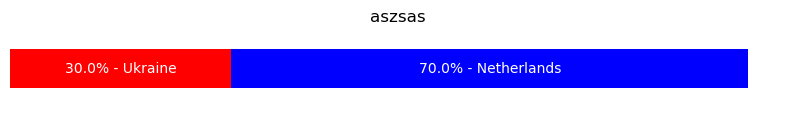

In [128]:
ax = pd.DataFrame({'a': [30, 70]}).T.plot.barh(stacked=True, figsize=(10, 1), color=['red', 'blue'])
ax.legend().set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False);

for c, lb in zip(ax.containers, ['Ukraine', 'Netherlands']):
    ax.bar_label(c,
                 label_type='center',
                 labels=[f'{cc/100:.1%} - {lb}' for cc in c.datavalues],
                 #fmt='%.0f%%', 
                 color='white'
                );
    
fig = ax.get_figure()
ax.set_title("aszsas")

In [122]:
c.

TypeError: index expected at least 1 argument, got 0

In [41]:
import altair as alt
from altair import datum

In [42]:
small_df = pd.DataFrame({'Probability A':[0.2,0.8,0.4],'Probability B':[0.5,0.1,0.1],'Probability C':[0.3,0.1,0.5],'ID':['John','Sally','Frank']})


In [43]:
alt.Chart(small_df).mark_bar().transform_fold(
        ['Probability A','Probability B','Probability C']
    ).encode(
        x=alt.X('value:Q',scale=alt.Scale(domain=[0, 1])),
        y='ID:N',
        color=alt.Color('key:N',
            # arrange the column-colr pairs to you what you want
            scale=alt.Scale(
                domain=['Probability C','Probability A','Probability B'],
                range=['red', 'orange', 'green']
            )
        ),
        #order=alt.Order('value:Q',sort='descending'),
        #order=alt.Order('key:N',sort='descending'),
)


/Users/maksym/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [52]:
bars = alt.Chart(small_df).mark_bar().transform_fold(
        ['Probability A','Probability B','Probability C']
    ).encode(
        x=alt.X('value:Q',scale=alt.Scale(domain=[0, 1]), axis=None),
        y=alt.Y('ID:N', axis=None),
        color=alt.Color('key:N',
            # arrange the column-colr pairs to you what you want
            scale=alt.Scale(
                domain=['Probability C','Probability A','Probability B'],
                range=['red', 'orange', 'green']
            )
        )
        #order=alt.Order('value:Q',sort='descending'),
        #order=alt.Order('key:N',sort='descending'),
)

text = alt.Chart(small_df).mark_text(dx=-15, dy=3, color='white').encode(
        x=alt.X('value:Q',scale=alt.Scale(domain=[0, 1]), axis=None),
        y=alt.Y('ID:N', axis=None),
        detail='key:N',
        text=alt.Text('value:Q', format='.1f')
)


bars + text

/Users/maksym/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)